In [0]:
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
PATH_OF_DATA= '/content/drive/"My Drive"/Bangla'
!ls {PATH_OF_DATA}

 1    11   13   15   17   19   20   4   6   8  'Experiment 1 train.csv'
 10   12   14   16   18   2    3    5   7   9


In [0]:
ShoreyAWm_dir = os.path.join ('/content/drive/My Drive/Bangla/1/dhaka/Male')

ShoreyAWf_dir = os.path.join ('/content/drive/My Drive/Bangla/1/dhaka/Female')

Ohm_dir = os.path.join ('/content/drive/My Drive/Bangla/10/Dhaka/Male')

Ohf_dir = os.path.join ('/content/drive/My Drive/Bangla/10/Dhaka/Female')


In [0]:
train_shoreyawm_names = os.listdir(ShoreyAWm_dir)
print(train_shoreyawm_names[:5])

train_ohm_names = os.listdir(Ohm_dir)
print(train_ohm_names[:5])

['01_0001_0_08_0916_1990_1.png', '01_0001_0_11_0916_1913_1.png', '01_0001_0_11_0916_1923_1.png', '01_0001_0_11_0916_1924_1.png', '01_0001_0_11_0916_1925_1.png']
['01_0001_0_11_0916_1918_10.png', '01_0001_0_11_0916_1919_10.png', '01_0001_0_11_0916_1920_10.png', '01_0001_0_08_0916_1990_10.png', '01_0001_0_11_0916_1913_10.png']


In [0]:
print('total shoreyaw male images:', len(os.listdir(ShoreyAWm_dir)))
print('total shoreyaw female images:', len(os.listdir(ShoreyAWf_dir)))
print('total oh male images:', len(os.listdir(Ohm_dir)))
print('total oh female images:', len(os.listdir(Ohf_dir)))

total shoreyaw male images: 400
total shoreyaw female images: 353
total oh male images: 400
total oh female images: 354


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Showing some shorey aw by male pictures...



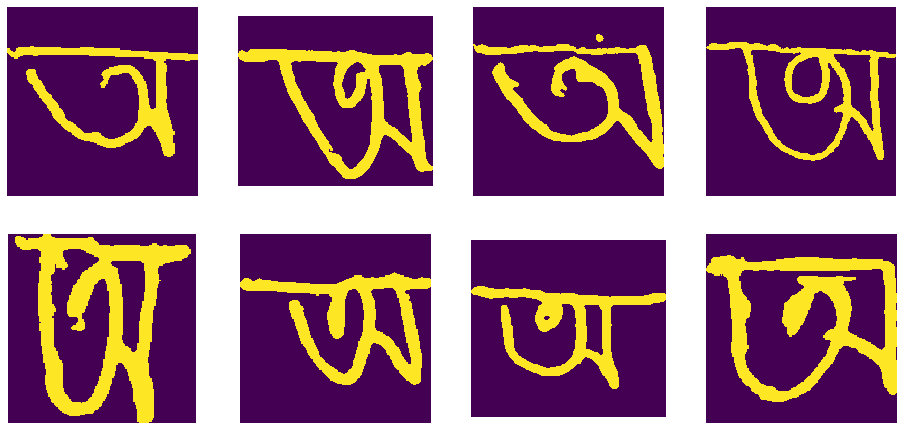

Showing some oh by male pictures...



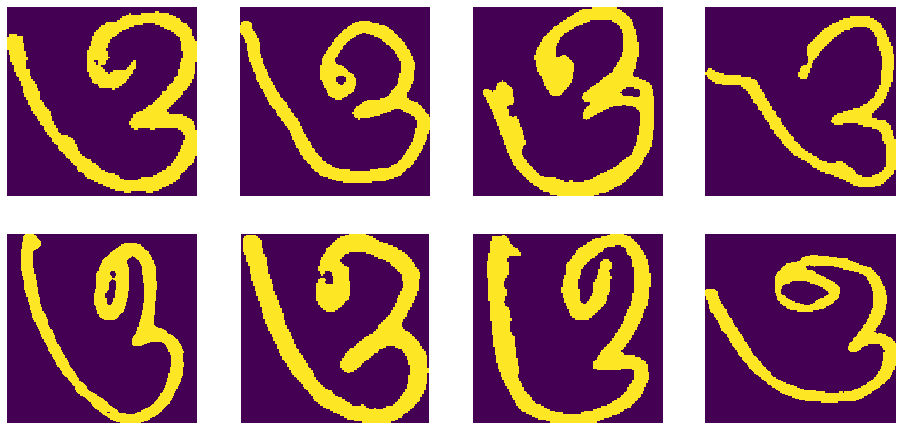

In [0]:
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_shoreyaw_pix = [os.path.join(ShoreyAWm_dir, fname) 
                for fname in train_shoreyawm_names[pic_index-8:pic_index]]
next_oh_pix = [os.path.join(Ohm_dir, fname) 
                for fname in train_ohm_names[pic_index-8:pic_index]]

print ("Showing some shorey aw by male pictures...")
print()
for i, img_path in enumerate(next_shoreyaw_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some oh by male pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_oh_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
batch_size = 128

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        ('/content/drive/My Drive/Bangla/'),  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 12568 images belonging to 20 classes.


In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
total_sample=train_generator.n

In [0]:
n_epochs = 20

In [0]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/15


ValueError: ignored

In [0]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


NameError: ignored

<Figure size 504x288 with 0 Axes>

In [0]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

NameError: ignored

<Figure size 504x288 with 0 Axes>

In [0]:
def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=20,num_classes=20,verbose=0):
    """
    Trains a conv net for the flowers dataset with a 5-class classifiction output
    Also provides suitable arguments for extending it to other similar apps
    
    Arguments:
            train_directory: The directory where the training images are stored in separate folders.
                            These folders should be named as per the classes.
            target_size: Target size for the training images. A tuple e.g. (200,200)
            classes: A Python list with the classes 
            batch_size: Batch size for training
            num_epochs: Number of epochs for training
            num_classes: Number of output classes to consider
            verbose: Verbosity level of the training, passed on to the `fit_generator` method
    Returns:
            A trained conv net model
    
    """
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow.keras.optimizers import RMSprop
    
    # ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            train_directory,  # This is the source directory for training images
            target_size=target_size,  # All images will be resized to 200 x 200
            batch_size=batch_size,
            # Specify the classes explicitly
            classes = classes,
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')
    
    input_shape = tuple(list(target_size)+[3])
    
    # Model architecture
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
    # Total sample count
    total_sample=train_generator.n
    
    # Training
    model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=num_epochs,
        verbose=verbose)
    
    return model

In [0]:
train_directory = "/content/drive/My Drive/Bangla/"

In [0]:
trained_model=train_CNN(train_directory=train_directory,classes=['1','10','11'],
                        num_epochs=30,num_classes=3,verbose=1)

Found 5938 images belonging to 3 classes.
Epoch 1/30
46/46 [==============================] - 1549s 34s/step - loss: 0.4348 - acc: 0.8344
Epoch 2/30
46/46 [==============================] - 230s 5s/step - loss: 0.1162 - acc: 0.9594
Epoch 3/30
46/46 [==============================] - 204s 4s/step - loss: 0.0815 - acc: 0.9735
Epoch 4/30
46/46 [==============================] - 203s 4s/step - loss: 0.0561 - acc: 0.9833
Epoch 5/30
46/46 [==============================] - 203s 4s/step - loss: 0.0401 - acc: 0.9861
Epoch 6/30
46/46 [==============================] - 205s 4s/step - loss: 0.0264 - acc: 0.9912
Epoch 7/30
46/46 [==============================] - 202s 4s/step - loss: 0.0212 - acc: 0.9941
Epoch 8/30
46/46 [==============================] - 199s 4s/step - loss: 0.0092 - acc: 0.9976
Epoch 9/30
46/46 [==============================] - 202s 4s/step - loss: 0.0147 - acc: 0.9950
Epoch 10/30
46/46 [==============================] - 202s 4s/step - loss: 0.0118 - acc: 0.9966
Epoch 11/30
46/